<a href="https://colab.research.google.com/github/GlebSimon/Gleb/blob/main/queries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3

In [ ]:
con = sqlite3.connect('db')

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'coll':[1,2,3]})

In [ ]:
df

,coll
0,1
1,2
2,3


In [ ]:
df.to_sql('test_table', con, index=False, if_exists='replace')

In [ ]:
sql = '''select t.coll * 3 as mult_3 
from test_table t'''

In [ ]:
pd.read_sql(sql, con)

,mult_3
0,3
1,6
2,9


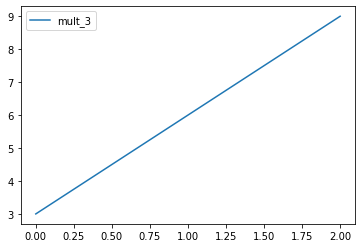

In [ ]:
pd.read_sql(sql, con).plot();

In [ ]:
!gdown --id 1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
!mv _sqlite3.cpython-37m-x86_64-linux-gnu.so /usr/lib/python3.7/lib-dynload/
import os
os.kill(os.getpid(), 9)

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
To: /content/_sqlite3.cpython-37m-x86_64-linux-gnu.so
100% 6.50M/6.50M [00:00<00:00, 79.6MB/s]


In [ ]:
sqlite3.sqlite_version

'3.38.0'

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"

In [ ]:
!gdown --id 1Gj0qVU0Acv-HqRjTIEwvkO4TqJYijehR

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Gj0qVU0Acv-HqRjTIEwvkO4TqJYijehR
To: /content/german_credit_augmented.csv
100% 69.6k/69.6k [00:00<00:00, 35.9MB/s]


In [ ]:
df = pd.read_csv('/content/german_credit_augmented.csv')

In [ ]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,contract_dt,client_id
0,33,male,2,own,NaN,NaN,3074,9,radio/TV,0,2008-06-29 18:52:00,210
1,43,male,1,own,little,little,1344,12,car,0,2007-05-20 18:30:19,929
2,52,male,2,own,quite rich,NaN,936,9,education,0,2008-04-27 08:23:07,200
3,35,female,3,own,little,NaN,1393,11,car,0,2007-05-06 10:58:22,45
4,28,male,2,own,little,NaN,776,12,radio/TV,0,2007-07-21 13:22:14,358


In [ ]:
df['contract_dt'] = pd.to_datetime(df['contract_dt'], format = '%Y-%m-%d %H:%M:%S')

In [ ]:
df.dtypes

age                          int64
sex                         object
job                          int64
housing                     object
saving_accounts             object
checking_account            object
credit_amount                int64
duration                     int64
purpose                     object
default                      int64
contract_dt         datetime64[ns]
client_id                    int64
dtype: object

In [ ]:
df.to_sql('german_credit', con, index=False, if_exists='replace')

In [ ]:
def  select(sql):
  return pd.read_sql(sql, con)  

In [ ]:
sql = '''select * from german_credit t 
where contract_dt between '2007-01-01' and '2007-12-31'
and t.purpose in ('car', 'repairs')
order by t.contract_dt desc, credit_amount

'''

In [ ]:
select(sql)

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,contract_dt,client_id
0,36,male,3,rent,None,moderate,7057,20,car,0,2007-12-29 16:10:08,99
1,30,male,2,own,little,moderate,639,12,repairs,1,2007-12-28 17:09:43,127
2,25,male,2,rent,moderate,moderate,1264,15,car,1,2007-12-28 08:38:58,979
3,48,male,2,own,little,None,2134,9,car,0,2007-12-24 16:28:30,20
4,67,female,2,own,little,moderate,3872,18,repairs,0,2007-12-24 12:25:28,779
...,...,...,...,...,...,...,...,...,...,...,...,...
192,55,male,2,own,rich,None,1413,12,car,0,2007-05-05 06:35:11,209
193,55,female,0,free,little,little,1190,18,repairs,1,2007-05-05 00:14:17,429
194,47,male,3,own,little,moderate,1209,6,car,1,2007-05-03 10:29:01,485
195,36,male,2,own,little,moderate,884,18,car,1,2007-05-02 06:22:11,184


In [ ]:
t = pd.DataFrame({'purpose':['машина','на машину','на покупку машины','автомобиль','на возвращение 2007'],
              'amount':[1000, 400, 600, 700, 1500]})

In [ ]:
t.to_sql('purpose', con, index=False, if_exists ='replace')

In [ ]:
sql = '''select * from purpose t '''

In [ ]:
select(sql)

,purpose,amount
0,машина,1000
1,на машину,400
2,на покупку машины,600
3,автомобиль,700
4,на возвращение 2007,1500


In [ ]:
sql = '''select * from purpose t
where (t.purpose like '%машин%'
or t.purpose like '%авто%') and t.amount > 500 '''

In [ ]:
select(sql)

,purpose,amount
0,машина,1000
1,на покупку машины,600
2,автомобиль,700


In [ ]:
sql = '''select 
avg (case when t.credit_amount > 1000 then 1 else 0 end) as greater_1000_frac
from german_credit t '''

In [ ]:
select(sql)

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,contract_dt,client_id
0,36,male,3,rent,None,moderate,7057,20,car,0,2007-12-29 16:10:08,99
1,30,male,2,own,little,moderate,639,12,repairs,1,2007-12-28 17:09:43,127
2,25,male,2,rent,moderate,moderate,1264,15,car,1,2007-12-28 08:38:58,979
3,48,male,2,own,little,None,2134,9,car,0,2007-12-24 16:28:30,20
4,67,female,2,own,little,moderate,3872,18,repairs,0,2007-12-24 12:25:28,779
...,...,...,...,...,...,...,...,...,...,...,...,...
192,55,male,2,own,rich,None,1413,12,car,0,2007-05-05 06:35:11,209
193,55,female,0,free,little,little,1190,18,repairs,1,2007-05-05 00:14:17,429
194,47,male,3,own,little,moderate,1209,6,car,1,2007-05-03 10:29:01,485
195,36,male,2,own,little,moderate,884,18,car,1,2007-05-02 06:22:11,184


In [ ]:
sql = '''select substr(t.purpose,1,1) as 'сокр'
from purpose t '''

In [ ]:
sql = '''select * from german_credit t'''

In [ ]:
select(sql)

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,contract_dt,client_id
0,33,male,2,own,None,None,3074,9,radio/TV,0,2008-06-29 18:52:00,210
1,43,male,1,own,little,little,1344,12,car,0,2007-05-20 18:30:19,929
2,52,male,2,own,quite rich,None,936,9,education,0,2008-04-27 08:23:07,200
3,35,female,3,own,little,None,1393,11,car,0,2007-05-06 10:58:22,45
4,28,male,2,own,little,None,776,12,radio/TV,0,2007-07-21 13:22:14,358
...,...,...,...,...,...,...,...,...,...,...,...,...
995,65,male,2,free,little,little,2600,18,radio/TV,1,2007-12-16 20:17:19,624
996,30,male,3,own,little,moderate,4455,36,business,1,2007-07-12 14:08:58,181
997,33,male,2,own,little,moderate,6403,24,radio/TV,0,2008-04-08 03:24:26,730
998,29,female,2,own,None,None,5003,21,car,1,2007-11-29 15:51:45,557


In [ ]:
sql = '''select t.sex,
count(1) as cnt,
avg(t.credit_amount) as credit_amount_avg

from german_credit t
group by t.sex'''

In [ ]:
select(sql)

,sex,cnt,credit_amount_avg
0,female,310,2877.774194
1,male,690,3448.040580


In [ ]:
sql = '''select 
t.housing,
count(*) as cnt,
avg(t.credit_amount) as credit_amount_avg
from german_credit t
group by t.housing

'''

In [ ]:
select(sql)

,housing,cnt,credit_amount_avg
0,free,108,4906.212963
1,own,713,3060.939691
2,rent,179,3122.553073


In [ ]:
sql = '''select count(t.checking_account) from german_credit t'''

In [ ]:
select(sql)

,count(t.checking_account)
0,606


In [ ]:
sql = '''select 
t.checking_account,
count(*) as cnt,
avg(t.credit_amount) as credit_amount_avg
from german_credit t
group by t.checking_account

'''

In [ ]:
select(sql)

,checking_account,cnt,credit_amount_avg
0,None,394,3133.101523
1,little,274,3175.218978
2,moderate,269,3827.561338
3,rich,63,2177.650794


In [ ]:
sql = '''select 
sum(case when t.checking_account is null then 1 else 0 end) as is_null

from german_credit t'''

In [ ]:
select(sql)

,is_null
0,394


*****Coalesce*****

In [ ]:
sql = '''select t.checking_account,

coalesce(t.checking_account, 'no_info')

from german_credit t'''

In [ ]:
select(sql)

,checking_account,"coalesce(t.checking_account, 'no_info')"
0,None,no_info
1,little,little
2,None,no_info
3,None,no_info
4,None,no_info
...,...,...
995,little,little
996,moderate,moderate
997,moderate,moderate
998,None,no_info


In [ ]:
t = pd.DataFrame({'id':[1,1,2], 'name':['a','a','b']})

In [ ]:
t

,id,name
0,1,a
1,1,a
2,2,b


In [ ]:
t.to_sql('dupl_test', con, index=False, if_exists='replace')

In [ ]:
sql = '''select * from dupl_test t'''

In [ ]:
select(sql)

,id,name
0,1,a
1,1,a
2,2,b


In [ ]:
sql = '''select t.id, t.name, count(1) as cnt from dupl_test t
group by t.id, t.name
having count(1)> 1'''


In [ ]:
select(sql)

,id,name,cnt
0,1,a,2


In [ ]:
t = pd.DataFrame({'id':[1,1,2,2,3], 
                  'name':['a','b','c','d','e']})

In [ ]:
t

,id,name
0,1,a
1,1,b
2,2,c
3,2,d
4,3,e


In [ ]:
t.to_sql('dupl_test', con, index=False, if_exists='replace')

In [ ]:
sql = '''select * from dupl_test t'''

In [ ]:
select(sql)

,id,name
0,1,a
1,1,b
2,2,c
3,2,d
4,3,e


In [ ]:
sql = '''select t.id, count(1) as cnt from dupl_test t
group by t.id
having count(1)> 1'''


In [ ]:
select(sql)

,id,cnt
0,1,2
1,2,2


In [ ]:
sql = '''select * from dupl_test t
where t.id in (select t.id as cnt from dupl_test t
group by t.id
having count(1)> 1)'''

In [ ]:
select(sql)

,id,name
0,1,a
1,1,b
2,2,c
3,2,d


In [ ]:
sql = '''select t.contract_dt from german_credit t'''

In [ ]:
select(sql)

,contract_dt
0,2008-06-29 18:52:00
1,2007-05-20 18:30:19
2,2008-04-27 08:23:07
3,2007-05-06 10:58:22
4,2007-07-21 13:22:14
...,...
995,2007-12-16 20:17:19
996,2007-07-12 14:08:58
997,2008-04-08 03:24:26
998,2007-11-29 15:51:45


In [ ]:
sql = '''select date(t.contract_dt, 'start of month') as month,  
count(1) as credit_cnt,
count(distinct t.client_id) as client_id_unique,
sum(t.credit_amount) as credit_amount_sum,
avg(credit_amount) as credit_amount_avg

from german_credit t
group by date(t.contract_dt, 'start of month')
order by date(t.contract_dt, 'start of month')
'''

In [ ]:
select(sql)

,month,credit_cnt,client_id_unique,credit_amount_sum,credit_amount_avg
0,2007-05-01,81,81,207663,2563.740741
1,2007-06-01,74,74,239594,3237.756757
2,2007-07-01,71,71,224333,3159.619718
3,2007-08-01,57,57,178569,3132.789474
4,2007-09-01,58,58,186909,3222.568966
5,2007-10-01,70,70,188534,2693.342857
6,2007-11-01,87,87,300504,3454.068966
7,2007-12-01,77,77,273973,3558.090909
8,2008-01-01,93,93,288080,3097.634409
9,2008-02-01,55,55,211128,3838.690909


In [ ]:
round(207663	/ 81, 2)

2563.74

In [ ]:
sql = '''select min(t.credit_amount) from german_credit t'''

In [ ]:
select(sql)

,min(t.credit_amount)
0,250


In [ ]:
sql = '''select t.credit_amount,
case when t.credit_amount < 1000 then '1. < 1000' 
when t.credit_amount < 2000 then '2. 1000-2000'
when t.credit_amount < 3000 then '3. 2000-3000'
when t.credit_amount >= 3000 then '4. >= 3000'
else 'other' end as credit_amount_bin


from german_credit t
'''

In [ ]:
select(sql)

,credit_amount,credit_amount_bin
0,3074,4. >= 3000
1,1344,2. 1000-2000
2,936,1. < 1000
3,1393,2. 1000-2000
4,776,1. < 1000
...,...,...
995,2600,3. 2000-3000
996,4455,4. >= 3000
997,6403,4. >= 3000
998,5003,4. >= 3000


In [ ]:
sql = '''select
case when t.credit_amount < 1000 then '1. < 1000' 
when t.credit_amount < 2000 then '2. 1000-2000'
when t.credit_amount < 3000 then '3. 2000-3000'
when t.credit_amount >= 3000 then '4. >= 3000'
else 'other' end as credit_amount_bin,

count(1) as credit_cnt

from german_credit t

group by 1
'''

In [ ]:
select(sql)

,credit_amount_bin,credit_cnt
0,1. < 1000,116
1,2. 1000-2000,316
2,3. 2000-3000,188
3,4. >= 3000,380


In [ ]:
sql = '''select * from german_credit t limit 5'''

In [ ]:
select(sql)

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,contract_dt,client_id
0,33,male,2,own,None,None,3074,9,radio/TV,0,2008-06-29 18:52:00,210
1,43,male,1,own,little,little,1344,12,car,0,2007-05-20 18:30:19,929
2,52,male,2,own,quite rich,None,936,9,education,0,2008-04-27 08:23:07,200
3,35,female,3,own,little,None,1393,11,car,0,2007-05-06 10:58:22,45
4,28,male,2,own,little,None,776,12,radio/TV,0,2007-07-21 13:22:14,358


In [ ]:
sql = '''select t.housing,
count(case when t.sex = 'female' then 1 else null end) as female,
count(case when t.sex = 'male' then 1 else null end) as male,
count(1) as cnt 
from german_credit t
group by t.housing
'''

In [ ]:
select(sql)

,housing,female,male,cnt
0,free,19,89,108
1,own,196,517,713
2,rent,95,84,179


In [ ]:
sql = '''select distinct t.purpose from german_credit t'''

In [ ]:
purpose = list(select(sql)['purpose'].values)

In [ ]:
for p in purpose:
  print(f"count(case when t.purpose = '{p}' then 1 else null end) as {p.lower().replace(' ','').replace('/','')},")

count(case when t.purpose = 'radio/TV' then 1 else null end) as radiotv,
count(case when t.purpose = 'car' then 1 else null end) as car,
count(case when t.purpose = 'education' then 1 else null end) as education,
count(case when t.purpose = 'furniture/equipment' then 1 else null end) as furnitureequipment,
count(case when t.purpose = 'repairs' then 1 else null end) as repairs,
count(case when t.purpose = 'business' then 1 else null end) as business,
count(case when t.purpose = 'domestic appliances' then 1 else null end) as domesticappliances,
count(case when t.purpose = 'vacation/others' then 1 else null end) as vacationothers,


In [ ]:
sql = '''select t.housing,
count(case when t.purpose = 'radio/TV' then 1 else null end) as radiotv,
count(case when t.purpose = 'car' then 1 else null end) as car,
count(case when t.purpose = 'education' then 1 else null end) as education,
count(case when t.purpose = 'furniture/equipment' then 1 else null end) as furnitureequipment,
count(case when t.purpose = 'repairs' then 1 else null end) as repairs,
count(case when t.purpose = 'business' then 1 else null end) as business,
count(case when t.purpose = 'domestic appliances' then 1 else null end) as domesticappliances,
count(case when t.purpose = 'vacation/others' then 1 else null end) as vacationothers,
count(1) as cnt 
from german_credit t
group by t.housing
'''

In [ ]:
select(sql)

,housing,radiotv,car,education,furnitureequipment,repairs,business,domesticappliances,vacationothers,cnt
0,free,15,55,15,11,3,5,0,4,108
1,own,227,219,34,122,17,76,10,8,713
2,rent,38,63,10,48,2,16,2,0,179


In [ ]:
t = pd.DataFrame({'purpose':['машина','машина','машина','на машину','на покупку машины','автомобиль','на возвращение 2007',
                  'на свадьбу','свадьба','свадьба','свадьба','для свадьбы','недвижимость', 'на покупку недвижимости']})

In [ ]:
t.to_sql('purpose', con, index=False, if_exists='replace')

In [ ]:
sql ='''select t.purpose, count(1) 
from purpose t
group by t.purpose
order by count(1) desc'''

In [ ]:
select(sql)

,purpose,count(1)
0,свадьба,3
1,машина,3
2,недвижимость,1
3,на свадьбу,1
4,на покупку недвижимости,1
5,на покупку машины,1
6,на машину,1
7,на возвращение 2007,1
8,для свадьбы,1
9,автомобиль,1


In [ ]:
cat = ''' select t.purpose,

case when t.purpose like '%свадьб%' then 'свадьба'
when t.purpose like '%машин%' or t.purpose like '%авто%' then 'машина'
when t.purpose like '%недвиж%' then 'недвижимость'
else 'другое' end as purpose_cat
from purpose t'''

In [ ]:
select(cat)

,purpose,purpose_cat
0,машина,машина
1,машина,машина
2,машина,машина
3,на машину,машина
4,на покупку машины,машина
5,автомобиль,машина
6,на возвращение 2007,другое
7,на свадьбу,свадьба
8,свадьба,свадьба
9,свадьба,свадьба


In [ ]:
sql = f''' select

t.purpose_cat,
count(1)

from ({cat}) t
group by t.purpose_cat'''

In [ ]:
select(sql)

,purpose_cat,count(1)
0,другое,1
1,машина,6
2,недвижимость,2
3,свадьба,5


In [ ]:
sql = f'''select t.purpose, count(1) 
from ({cat}) t
where purpose_cat = 'другое'
group by t.purpose
order by count(1) desc'''

In [ ]:
select(sql)

,purpose,count(1)
0,на возвращение 2007,1


In [ ]:
a = 'Gleb'

In [ ]:
f'Hello {a}'

'Hello Gleb'

# Подзапросы

In [ ]:
t = pd.DataFrame({'id':[1,1,2,2,3], 
                  'name':['a','b','c','d','e']})

In [ ]:
t

,id,name
0,1,a
1,1,b
2,2,c
3,2,d
4,3,e


In [ ]:
t.to_sql('dupl_test', con, index=False, if_exists='replace')

In [ ]:
sql = '''select * from dupl_test t'''

In [ ]:
select(sql)

,id,name
0,1,a
1,1,b
2,2,c
3,2,d
4,3,e


In [ ]:
sql = '''select t.id
from dupl_test t
group by t.id
having count(1) > 1'''

In [ ]:
select(sql)

,id
0,1
1,2


In [ ]:
sql = '''select * from dupl_test t
where t.id in (select t.id
from dupl_test t
group by t.id
having count(1) > 1)'''

In [ ]:
select(sql)

,id,name
0,1,a
1,1,b
2,2,c
3,2,d


In [ ]:
sql = ''' 
with categories as (
select t.purpose,

case when t.purpose like '%свадьб%' then 'свадьба'
when t.purpose like '%машин%' or t.purpose like '%авто%' then 'машина'
when t.purpose like '%недвиж%' then 'недвижимость'
else 'другое' end as purpose_cat
from purpose t)

select t.purpose_cat, count (1)
from categories t
group by t.purpose_cat

'''

In [ ]:
select(sql)

,purpose_cat,count (1)
0,другое,1
1,машина,6
2,недвижимость,2
3,свадьба,5


In [ ]:
sql = '''select min(t.credit_amount) from (
select t.credit_amount from german_credit t order by t.credit_amount desc limit 2) t
'''

In [ ]:
select(sql)

,min(t.credit_amount)
0,15945


# Joins


In [ ]:
users = pd.DataFrame({'id':[1,2,3], 'name':['gleb','jon snow','tyrion']})

In [ ]:
users

,id,name
0,1,gleb
1,2,jon snow
2,3,tyrion


In [ ]:
items = pd.DataFrame({'user_id':[1,3,3], 'item_name':['hleb','gold','wine'], 'value':[5,100,20]})

In [ ]:
items

,user_id,item_name,value
0,1,hleb,5
1,3,gold,100
2,3,wine,20


In [ ]:
users.to_sql('users', con, index=False, if_exists = 'replace')

In [ ]:
items.to_sql('items', con, index=False, if_exists = 'replace')

In [ ]:
sql = '''select t.*, i.item_name from users t
left join items i on t.id = i.user_id
'''

In [ ]:
select(sql)

,id,name,item_name
0,1,gleb,hleb
1,2,jon snow,None
2,3,tyrion,gold
3,3,tyrion,wine


In [ ]:
sql ='''select * from items t'''

In [ ]:
select(sql)

,user_id,item_name,value
0,1,hleb,5
1,3,gold,100
2,3,wine,20


In [ ]:
sql = '''select t.user_id,count(t.item_name) as item_cnt,
sum(value) as value_sum
from items t
group by t.user_id'''

In [ ]:
select(sql)

,user_id,item_cnt,value_sum
0,1,1,5
1,3,2,120


In [ ]:
sql = '''
with items_agg as(
select t.user_id,count(t.item_name) as item_cnt,
sum(value) as value_sum
from items t
group by t.user_id)

select * from users t
left join items_agg on t.id = i.user_id

'''

In [ ]:
! gdown --id 1ksjv4EsLItdn9rYA4oxislish-c4eE4D

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ksjv4EsLItdn9rYA4oxislish-c4eE4D
To: /content/german_credit_augmented_transactions.csv
100% 134k/134k [00:00<00:00, 60.8MB/s]


***Select к таблице***

In [ ]:
sql = '''select t.* from german_credit t limit 5'''

In [ ]:
t = select (sql)

In [ ]:
t

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,contract_dt,client_id
0,33,male,2,own,None,None,3074,9,radio/TV,0,2008-06-29 18:52:00,210
1,43,male,1,own,little,little,1344,12,car,0,2007-05-20 18:30:19,929
2,52,male,2,own,quite rich,None,936,9,education,0,2008-04-27 08:23:07,200
3,35,female,3,own,little,None,1393,11,car,0,2007-05-06 10:58:22,45
4,28,male,2,own,little,None,776,12,radio/TV,0,2007-07-21 13:22:14,358


In [ ]:
! ls '/content/drive/MyDrive/Data'

german_credit.db


In [ ]:
con = sqlite3.connect('/content/drive/MyDrive/Data/german_credit.db')

In [ ]:
df.to_sql('german_credit', con, index=False, if_exists='replace')